<a href="https://colab.research.google.com/github/ayudixit/ML_Training/blob/main/Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MSE: 2044165115591.7866, R2: 0.5253182966980272
Confusion Matrix: [[58 28]
 [18 60]]


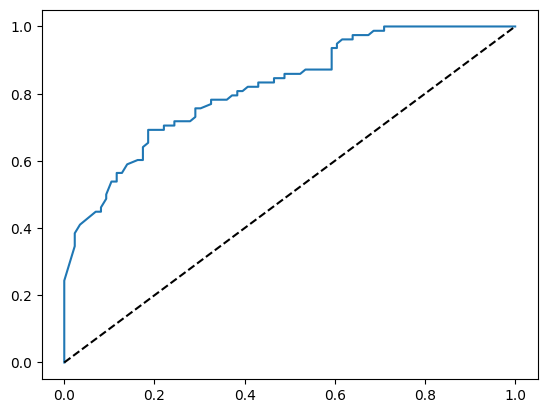

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load and preprocess dataset
data = pd.read_csv('/content/Housing.csv')
le = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    data[col] = le.fit_transform(data[col])

# Define features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X = data[features]
y = data['price']
price_median = y.median()
data['price_category'] = (data['price'] > price_median).astype(int)

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regression model
regressor = LinearRegression().fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")

# Binary classification model
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, data['price_category'], test_size=0.3, random_state=42)
classifier = RandomForestClassifier(random_state=42).fit(X_train_class, y_train_class)
y_pred_class = classifier.predict(X_test_class)
print("Confusion Matrix:", confusion_matrix(y_test_class, y_pred_class))
fpr, tpr, _ = roc_curve(y_test_class, classifier.predict_proba(X_test_class)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

# User input function
def get_user_input():
    area = float(input("Enter area of the house: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    bathrooms = int(input("Enter number of bathrooms: "))
    stories = int(input("Enter number of stories: "))
    parking = int(input("Enter number of parking spaces: "))
    return np.array([[area, bedrooms, bathrooms, stories, parking]])

user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)
print(f"Predicted Price: {regressor.predict(user_input_scaled)[0]:.2f}")
print(f"Price Category: {'Above' if classifier.predict(user_input_scaled)[0] == 1 else 'Below'} Median")